In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
train = pd.read_csv('../input/train.csv')
testA = pd.read_csv('../input/testA.csv')

In [2]:
train = pd.read_csv('../input/train.csv')
testa = pd.read_csv('../input/testA.csv')

导入数据

In [3]:
print('Train data shape:',train.shape)
print('TestA data shape:',testA.shape)

Train data shape: (800000, 45)
TestA data shape: (200000, 44)


In [6]:
pd.set_option('display.max_columns', None)

In [5]:
train.head(10)

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,n0,n1,n2,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,2,2014/7/1,1,1,137.0,32,17.05,0,730,734,7,0,0.0,24178,48.9,27,0,0,1-Aug,1.0,0.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,2,2012/8/1,0,0,156.0,18,27.83,0,700,704,13,0,0.0,15096,38.9,18,1,0,2-May,1723.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,2,2015/10/1,0,0,337.0,14,22.77,0,675,679,11,0,0.0,4606,51.8,27,0,0,6-May,0.0,0.0,0.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000,3,7.26,340.96,A,A4,46854.0,10+ years,1,118000.0,1,2015/8/1,0,4,148.0,11,17.21,0,685,689,9,0,0.0,9948,52.6,28,1,0,May-99,4.0,6.0,4.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000,3,12.99,101.07,C,C2,54.0,NaN,1,29000.0,2,2016/3/1,0,10,301.0,21,32.16,0,690,694,12,0,0.0,2942,32.0,27,0,0,Aug-77,11.0,1.0,2.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0
5,5,11000,3,7.99,344.65,A,A5,51727.0,7 years,0,39000.0,2,2017/4/1,0,9,512.0,21,17.14,0,730,734,19,0,0.0,4047,31.1,52,1,0,Jul-98,10.0,12.0,1.0,2.0,1.0,1.0,48.0,2.0,3.0,2.0,19.0,0.0,0.0,0.0,0.0
6,6,2050,3,7.69,63.95,A,A4,180083.0,9 years,0,35000.0,0,2014/10/1,0,0,517.0,14,17.49,0,755,759,12,0,0.0,3111,8.5,23,0,0,6-Oct,0.0,0.0,1.0,3.0,7.0,11.0,3.0,10.0,18.0,3.0,12.0,0.0,0.0,0.0,3.0
7,7,11500,3,14.98,398.54,C,C3,214017.0,1 year,1,30000.0,2,2014/1/1,0,0,100.0,4,32.60,0,665,669,8,1,1.0,14021,59.7,33,1,0,Dec-94,0.0,0.0,4.0,4.0,4.0,16.0,10.0,5.0,21.0,4.0,8.0,0.0,0.0,0.0,2.0
8,8,12000,3,12.99,404.27,C,C2,188.0,5 years,2,60000.0,1,2016/5/1,1,0,792.0,13,19.22,0,690,694,15,0,0.0,27176,46.0,21,1,0,Apr-94,0.0,0.0,7.0,13.0,7.0,7.0,2.0,13.0,17.0,11.0,15.0,NaN,0.0,0.0,6.0
9,9,6500,3,10.99,212.78,B,B4,54.0,NaN,1,15300.0,2,2015/11/1,0,0,59.0,11,24.39,0,725,729,7,0,0.0,2936,30.6,63,0,0,Jan-93,0.0,0.0,4.0,5.0,4.0,21.0,24.0,6.0,39.0,5.0,7.0,0.0,0.0,0.0,8.0


In [6]:
train.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'n0', 'n1', 'n2', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11',
       'n12', 'n13', 'n14'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 45 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  int64  
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [8]:
testa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 44 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  200000 non-null  int64  
 1   loanAmnt            200000 non-null  int64  
 2   term                200000 non-null  int64  
 3   interestRate        200000 non-null  float64
 4   installment         200000 non-null  float64
 5   grade               200000 non-null  object 
 6   subGrade            200000 non-null  object 
 7   employmentTitle     200000 non-null  int64  
 8   employmentLength    188258 non-null  object 
 9   homeOwnership       200000 non-null  int64  
 10  annualIncome        200000 non-null  float64
 11  verificationStatus  200000 non-null  int64  
 12  issueDate           200000 non-null  object 
 13  purpose             200000 non-null  int64  
 14  postCode            200000 non-null  int64  
 15  regionCode          200000 non-nul

In [7]:
train.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,n0,n1,n2,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,799761.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799595.000000,8.000000e+05,799469.000000,800000.000000,800000.000000,800000.000000,799999.000000,759730.000000,759730.000000,759730.000000,766761.000000,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,1.745982,258.535648,16.385758,18.284557,0.318239,696.204081,700.204226,11.598020,0.214915,0.134163,1.622871e+04,51.790734,24.998861,0.416953,0.019267,1754.113589,0.511932,3.642330,5.642648,4.735641,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252013,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,2.367453,200.037446,11.036679,11.150155,0.880325,31.865995,31.866674,5.475286,0.606467,0.377471,2.245802e+04,24.516126,11.999201,0.493055,0.137464,7941.474040,1.333266,2.246825,3.302810,2.949969,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,630.000000,634.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,0.000000,103.000000,8.000000,11.790000,0.000000,670.000000,674.000000,8.000000,0.000000,0.000000,5.944000e+03,33.400000,16.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,0.000000,203.000000,14.000000,17.610000,0.000000,690.000000,694.000000,11.000000,0.000000,0.000000,1.113200e+04,52.100000,23.000000,0.000000,0.000000,1.000000,0.000000,3.000000,5.000000,4.000000,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,4.000000,395.000000,22.000000,24.060000,0.000000,710.000000,714.000000,14.000000,0.000000,0.000000,1.973400e+04,70.700000,32.000000,1.000000,0.000000,5.000000,0.000000,5.000000,7.000000,6.000000,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,13.000000,940.000000,50.000000,999.000000,39.000000,845.000000,850.000000,86.000000,86.000000,12.000000,2.904836e+06,892.300000,162.000000,1.000000,1.000000,61680.000000,51.000000,33.000000,63.000000,49.000000,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [8]:
train.describe(include="all")

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,n0,n1,n2,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000,800000,799999.000000,753201,800000.000000,8.000000e+05,800000.000000,800000,800000.000000,800000.000000,799999.000000,800000.000000,799761.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799595.000000,8.000000e+05,799469.000000,800000.000000,800000.000000,800000.000000,800000,799999.000000,759730.000000,759730.000000,759730.000000,766761.000000,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
unique,NaN,NaN,NaN,NaN,NaN,7,35,NaN,11,NaN,NaN,NaN,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,B,C1,NaN,10+ years,NaN,NaN,NaN,2016/3/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-Aug,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,233690,50763,NaN,262753,NaN,NaN,NaN,29066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,NaN,NaN,72005.351714,NaN,0.614213,7.613391e+04,1.009683,NaN,0.199513,1.745982,258.535648,16.385758,18.284557,0.318239,696.204081,700.204226,11.598020,0.214915,0.134163,1.622871e+04,51.790734,24.998861,0.416953,0.019267,NaN,1754.113589,0.511932,3.642330,5.642648,4.735641,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252013,8716.086178,0.855832,4.765757,261.460393,NaN,NaN,106585.640204,NaN,0.675749,6.894751e+04,0.782716,NaN,0.399634,2.367453,200.037446,11.036679,11.150155,0.880325,31.865995,31.866674,5.475286,0.606467,0.377471,2.245802e+04,24.516126,11.999201,0.493055,0.137464,NaN,7941.474040,1.333266,2.246825,3.302810,2.949969,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,NaN,NaN,0.000000,NaN,0.000000,0.000000e+00,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,630.000000,634.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,NaN,NaN,427.000000,NaN,0.000000,4.560000e+04,0.000000,NaN,0.000000,0.000000,103.000000,8.000000,11.790000,0.000000,670.000000,674.000000,8.000000,0.000000,0.000000,5.944000e+03,33.400000,16.000000,0.000000,0.000000,NaN,0.000000,0.000000,2.000000,3.000000,3.000000,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,NaN,NaN,7755.000000,NaN,1.000000,6.500000e+04,1.000000,NaN,0.000000,0.000000,203.000000,14.000000,17.610000,0.000000,690.000000,694.000000,11.000000,0.000000,0.000000,1.113200e+04,52.100000,23.000000,0.000000,0.000000,NaN,1.000000,0.000000,3.000000,5.000000,4.000000,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,NaN,NaN,117663.500000,NaN,1.000000,9.000000e+04,2.000000,NaN,0.000000,4.000000,395.000000,22.000000,24.060000,0.000000,710.000000,714.000000,14.000000,0.000000,0.000000,1.973400e+04,70.700000,32.000000,1.000000,0.000000,NaN,5.000000,0.000000,5.000000,7.000000,6.000000,11.000000,11.000000,

In [10]:
testa.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,n0,n1,n2,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,199939.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,199884.000000,2.000000e+05,199873.000000,200000.000000,200000.000000,200000.000000,200000.000000,189889.000000,189889.000000,189889.000000,191606.000000,189889.000000,189889.000000,189889.000000,189889.000000,189889.000000,191606.000000,182425.000000,189889.000000,189889.000000,189889.000000
mean,899999.500000,14436.954125,3.481690,13.244800,438.737804,72435.750740,0.614100,7.645184e+04,1.010430,1.744410,258.259535,16.430830,18.291282,0.315895,696.166400,700.166530,11.580340,0.21553,0.135293,1.625583e+04,51.875121,24.921810,0.416650,0.019465,1778.180570,0.507865,3.648110,5.647141,4.732545,8.093976,8.527334,8.274840,14.592551,5.596296,11.626891,0.000833,0.003618,0.088341,2.180316
std,57735.171256,8737.430326,0.855195,4.766528,262.246698,106892.374933,0.675465,7.766237e+04,0.781732,2.367497,199.752214,11.061279,11.493806,0.876316,31.852619,31.853228,5.455525,0.60653,0.380665,2.243082e+04,24.555849,11.943628,0.493005,0.138153,7983.247915,1.315019,2.257779,3.308588,2.959386,4.803759,7.303106,4.550902,8.109357,3.220978,5.464619,0.030516,0.064276,0.505161,1.841987
min,800000.000000,500.000000,3.000000,5.310000,14.010000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,625.000000,629.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,849999.750000,8000.000000,3.000000,9.750000,248.890000,420.000000,0.000000,4.600000e+04,0.000000,0.000000,103.000000,8.000000,11.830000,0.000000,670.000000,674.000000,8.000000,0.00000,0.000000,5.940000e+03,33.500000,16.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,899999.500000,12000.000000,3.000000,12.740000,375.430000,7836.000000,1.000000,6.500000e+04,1.000000,0.000000,203.000000,14.000000,17.620000,0.000000,690.000000,694.000000,11.000000,0.00000,0.000000,1.114000e+04,52.300000,23.000000,0.000000,0.000000,2.000000,0.000000,3.000000,5.000000,4.000000,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,949999.250000,20000.000000,3.000000,15.990000,580.942500,119739.250000,1.000000,9.000000e+04,2.000000,4.000000,392.000000,22.000000,24.080000,0.000000,710.000000,714.000000,14.000000,0.00000,0.000000,1.977925e+04,70.800000,32.000000,1.000000,0.000000,5.000000,0.000000,5.000000,7.000000,6.000000,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,999999.000000,40000.000000,5.000000,30.990000,1715.420000,378338.000000,5.000000,9.500000e+06,2.000000,13.000000,931.000000,50.000000,999.000000,28.000000,845.000000,850.000000,90.000000,61.00000,11.000000,1.743266e+06,366.600000,127.000000,1.000000,1.000000,61676.000000,32.000000,32.000000,51.000000,63.000000,70.000000,99.000000,83.000000,112.000000,41.000000,90.000000,3.000000,3.000000,25.000000,28.000000


In [11]:
train.head().append(train.tail())

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,n0,n1,n2,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,2,2014/7/1,1,1,137.0,32,17.05,0,730,734,7,0,0.0,24178,48.9,27,0,0,1-Aug,1.0,0.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,2,2012/8/1,0,0,156.0,18,27.83,0,700,704,13,0,0.0,15096,38.9,18,1,0,2-May,1723.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,2,2015/10/1,0,0,337.0,14,22.77,0,675,679,11,0,0.0,4606,51.8,27,0,0,6-May,0.0,0.0,0.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000,3,7.26,340.96,A,A4,46854.0,10+ years,1,118000.0,1,2015/8/1,0,4,148.0,11,17.21,0,685,689,9,0,0.0,9948,52.6,28,1,0,May-99,4.0,6.0,4.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000,3,12.99,101.07,C,C2,54.0,NaN,1,29000.0,2,2016/3/1,0,10,301.0,21,32.16,0,690,694,12,0,0.0,2942,32.0,27,0,0,Aug-77,11.0,1.0,2.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0
799995,799995,25000,3,14.49,860.41,C,C4,2659.0,7 years,1,72000.0,0,2016/7/1,0,0,242.0,8,19.03,0,710,714,14,0,0.0,9933,46.4,15,1,0,11-Aug,0.0,0.0,5.0,10.0,6.0,6.0,2.0,12.0,13.0,10.0,14.0,0.0,0.0,0.0,3.0
799996,799996,17000,3,7.90,531.94,A,A4,29205.0,10+ years,0,99000.0,2,2013/4/1,0,4,563.0,10,15.72,1,720,724,7,0,0.0,20472,98.4,42,0,0,May-89,33369.0,0.0,2.0,2.0,2.0,15.0,16.0,2.0,19.0,2.0,7.0,0.0,0.0,0.0,0.0
799997,799997,6000,3,13.33,203.12,C,C3,2582.0,10+ years,1,65000.0,2,2015/10/1,1,0,47.0,17,12.11,1,670,674,5,0,0.0,6381,51.9,36,1,0,2-Jul,0.0,2.0,1.0,4.0,1.0,4.0,26.0,4.0,10.0,4.0,5.0,0.0,0.0,1.0,4.0
799998,799998,19200,3,6.92,592.14,A,A4,151.0,10+ years,0,96000.0,2,2015/2/1,0,4,34.0,18,29.25,0,675,679,16,0,0.0,69702,61.3,37,1,0,Jan-94,4.0,0.0,5.0,8.0,7.0,10.0,6.0,12.0,22.0,8.0,16.0,0.0,0.0,0.0,5.0
799999,799999,9000,3,11.06,294.91,B,B3,13.0,5 years,0,120000.0,0,2018/8/1,0,4,62.0,13,8.99,0,695,699,7,0,0.0,8420,72.6,13,0,0,2-Feb,4.0,2.0,2.0,3.0,2.0,3.0,4.0,4.0,8.0,3.0,7.0,0.0,0.0,0.0,2.0


In [9]:
"""import pandas_profiling
pfr = pandas_profiling.ProfileReport(train)
pfr.to_file("./traineg.html")"""

'import pandas_profiling\npfr = pandas_profiling.ProfileReport(train)\npfr.to_file("./traineg.html")'

#### 缺失值

<AxesSubplot:>

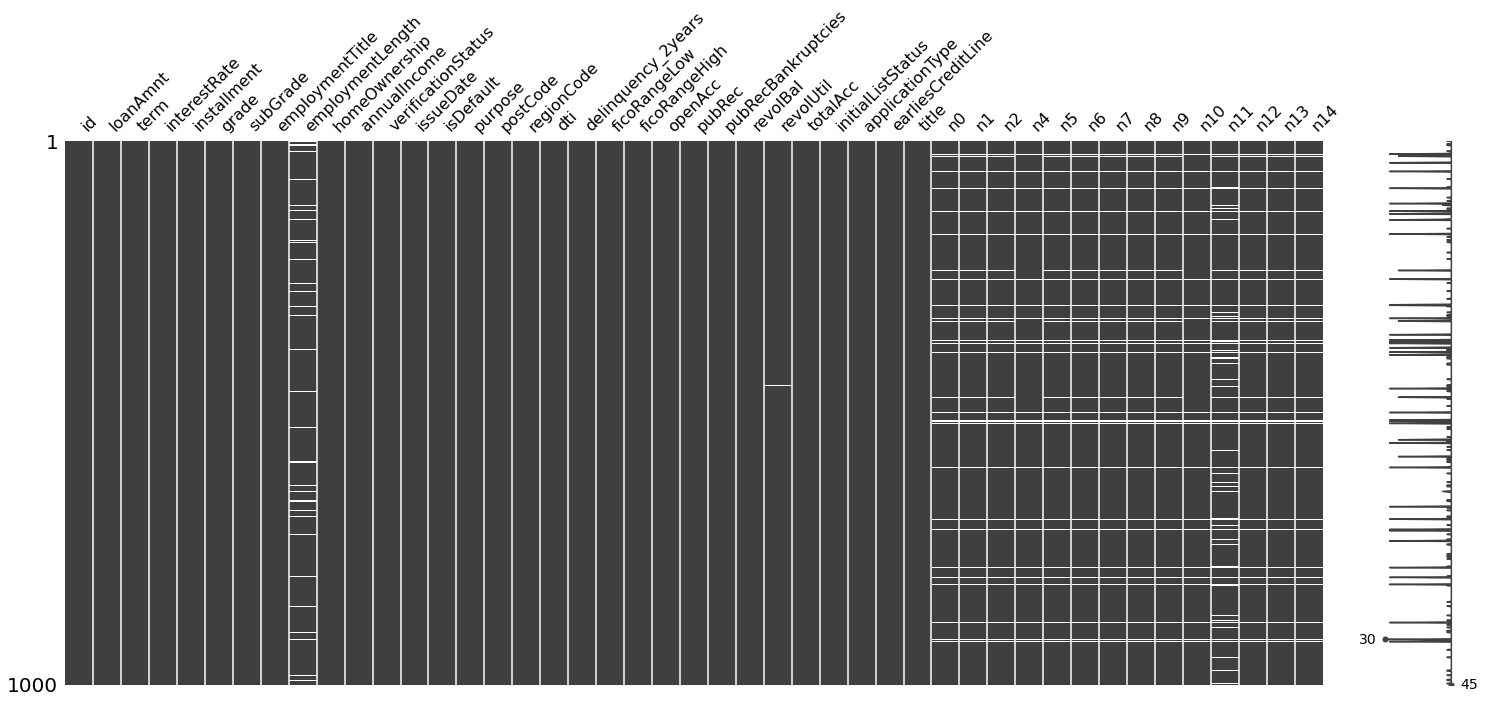

In [13]:
import missingno as msno
# 可视化看下缺省值
msno.matrix(train.sample(1000))

<AxesSubplot:>

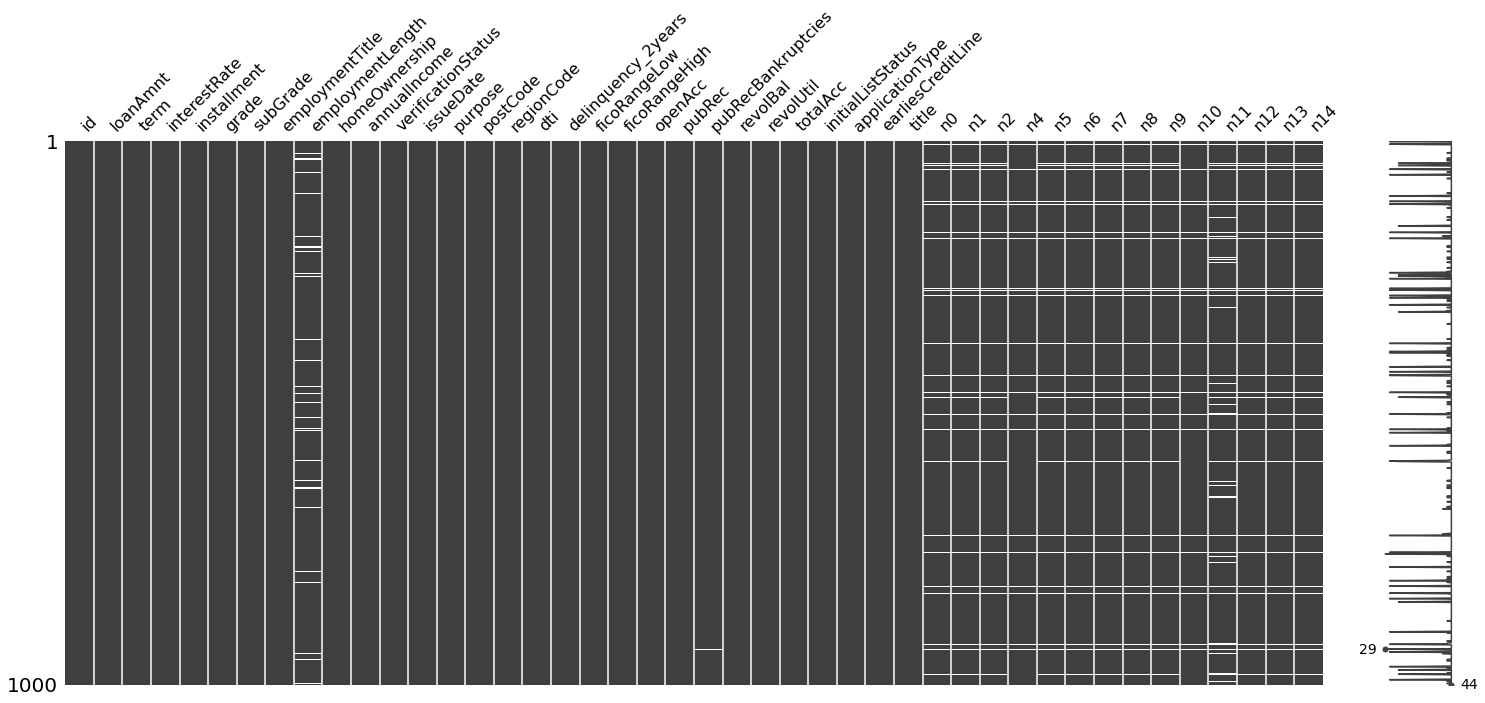

In [14]:
# 可视化看下缺省值
msno.matrix(testA.sample(1000))

In [15]:
#? num_fea = [a for a in cols ~ cat_fea ]

In [16]:
cat_fea = ['grade', 'subGrade', 'employmentTitle', 'verificationStatus', 'purpose', 'postCode', 'regionCode']

In [17]:
"""" cols = ['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'detlinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9',
       'n10', 'n11', 'n12', 'n13', 'n14']
"""

['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'grade',
 'subGrade',
 'employmentTitle',
 'employmentLength',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'issueDate',
 'isDefault',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'detlinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'earliesCreditLine',
 'title',
 'policyCode',
 'n0',
 'n1',
 'n2',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

#### 离散变量查看

In [10]:
train['employmentLength'].value_counts(dropna=False)

10+ years    262753
2 years       72358
< 1 year      64237
3 years       64152
1 year        52489
5 years       50102
4 years       47985
NaN           46799
6 years       37254
8 years       36192
7 years       35407
9 years       30272
Name: employmentLength, dtype: int64

<AxesSubplot:xlabel='purpose', ylabel='count'>

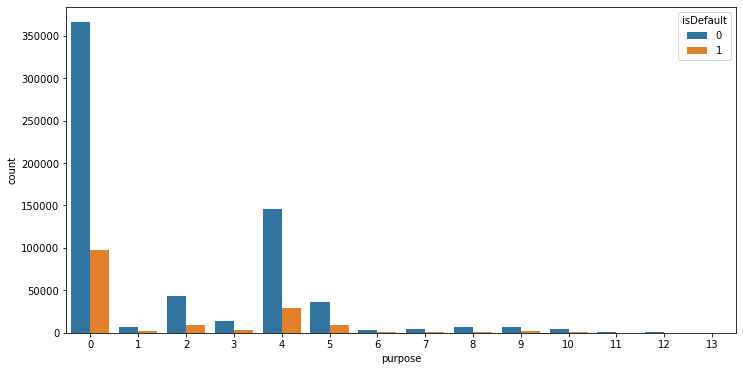

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(data=train, x='purpose', hue='isDefault')

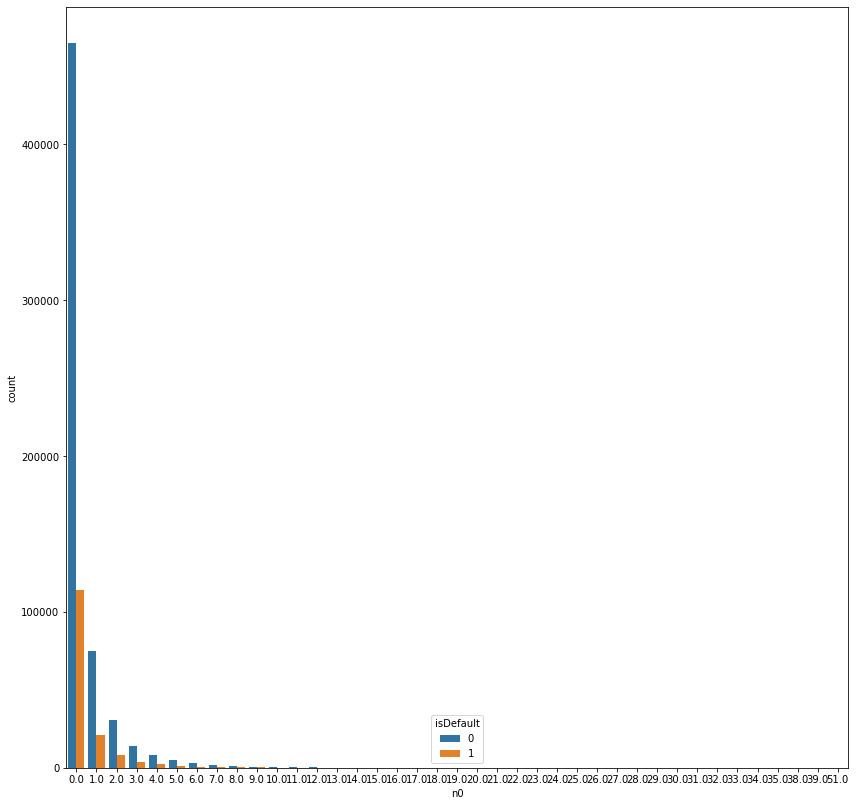

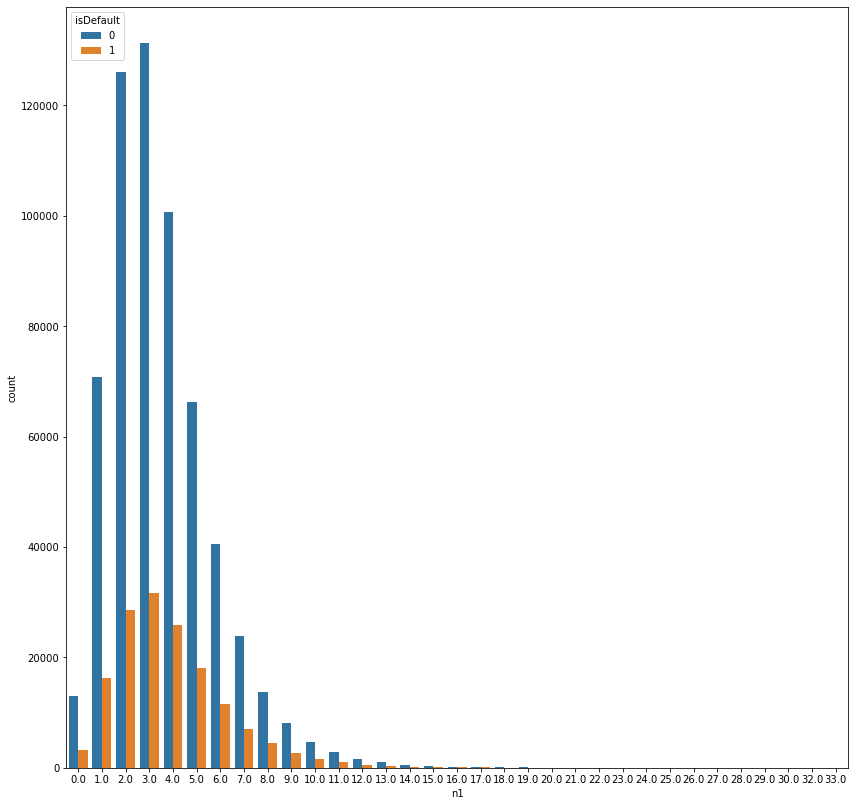

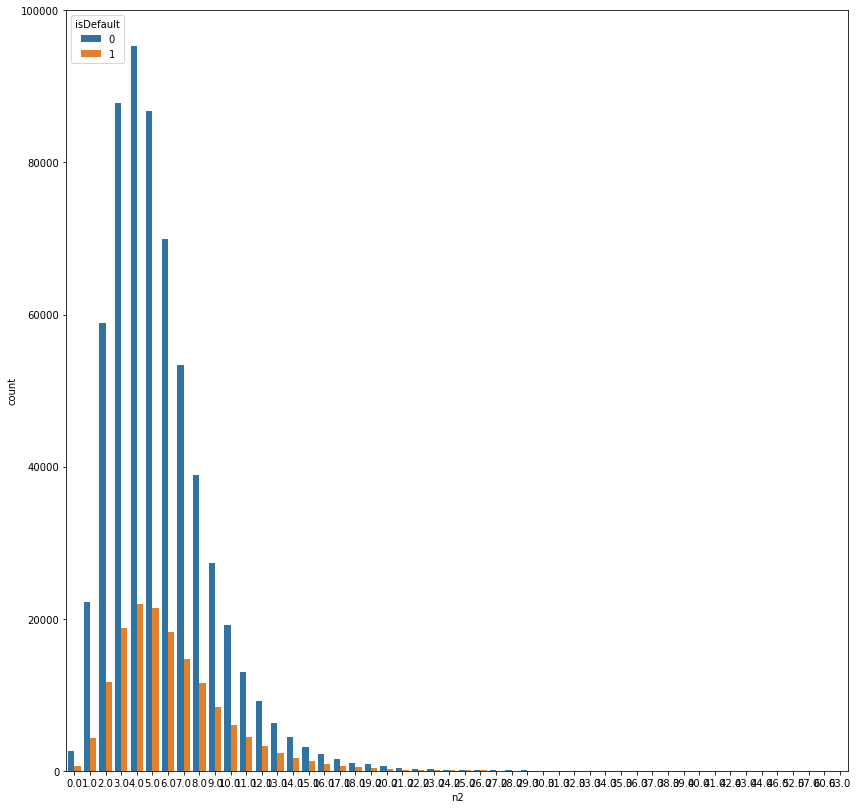

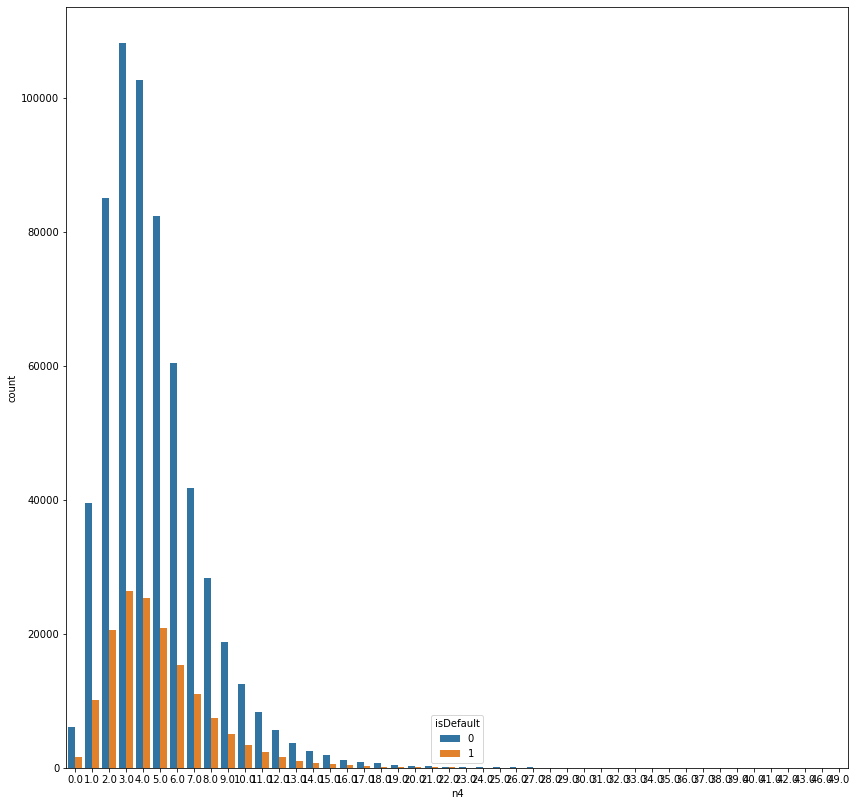

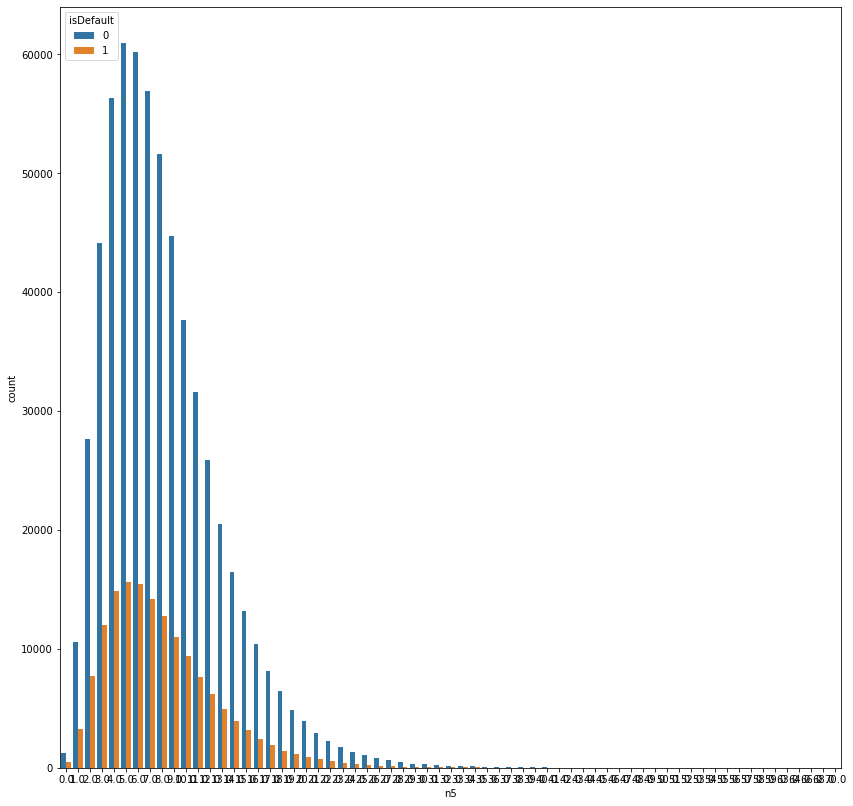

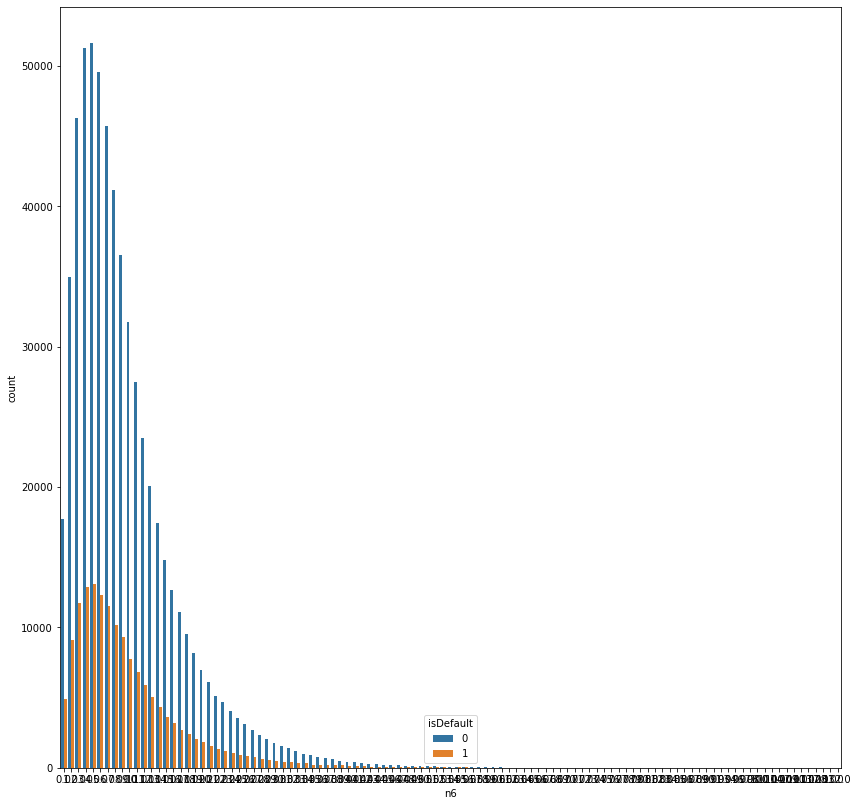

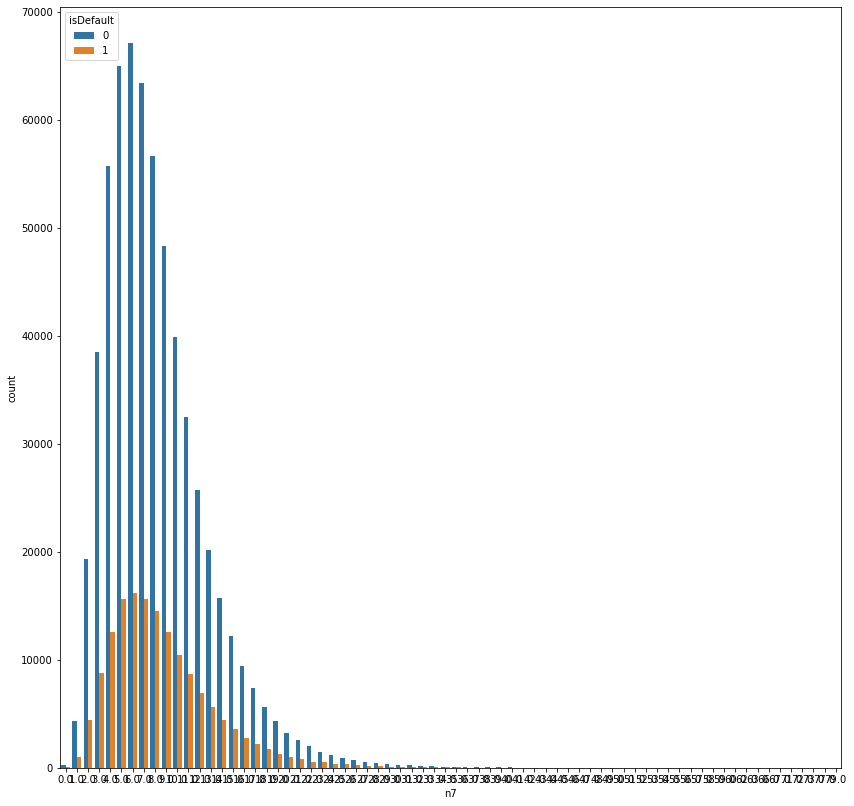

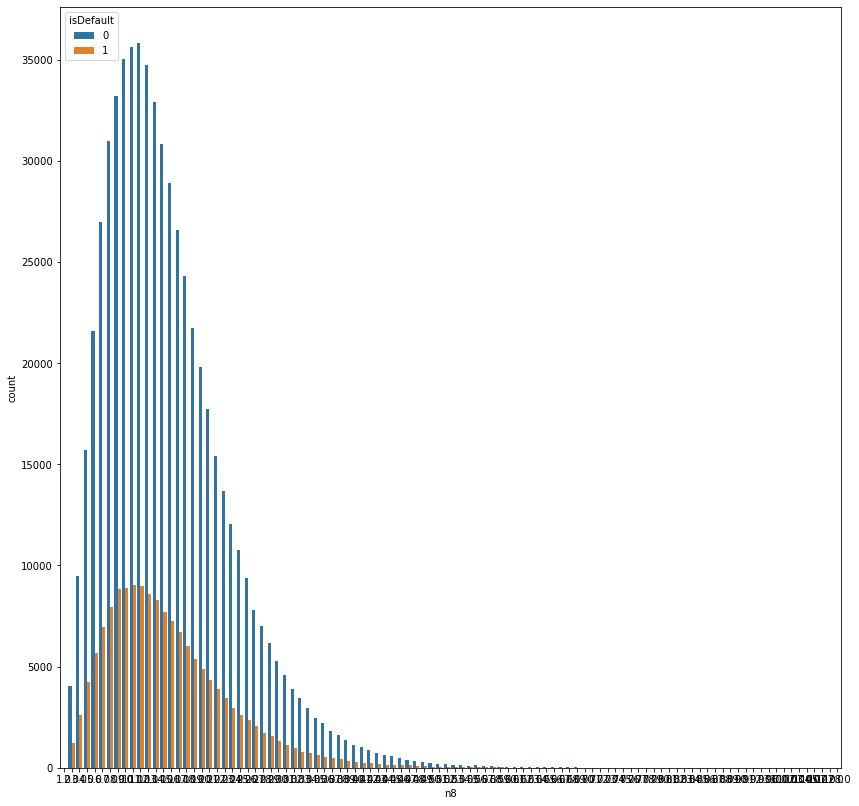

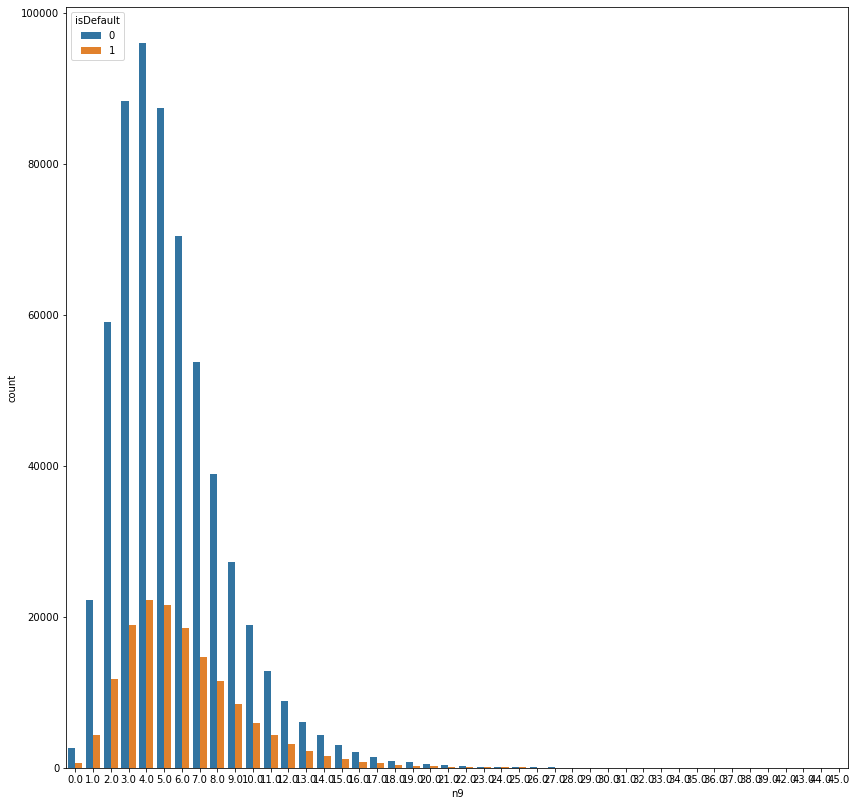

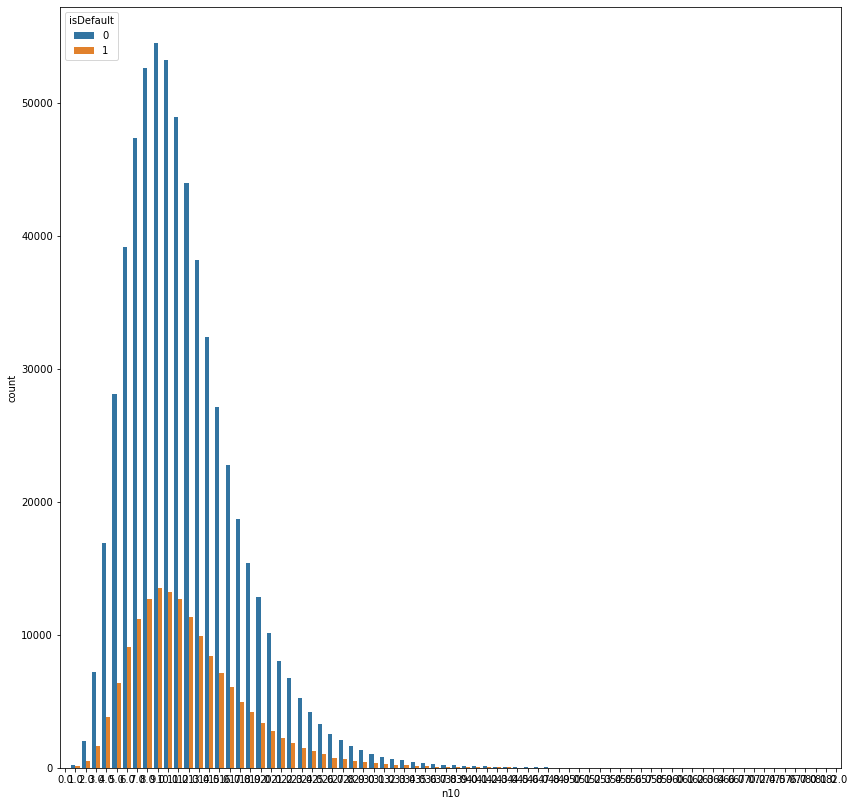

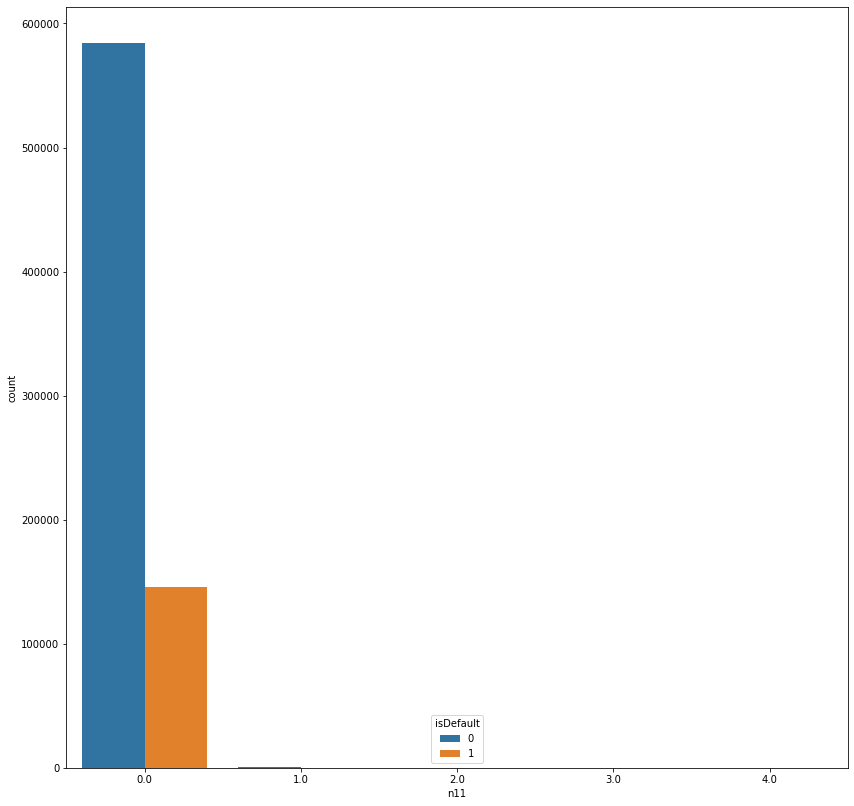

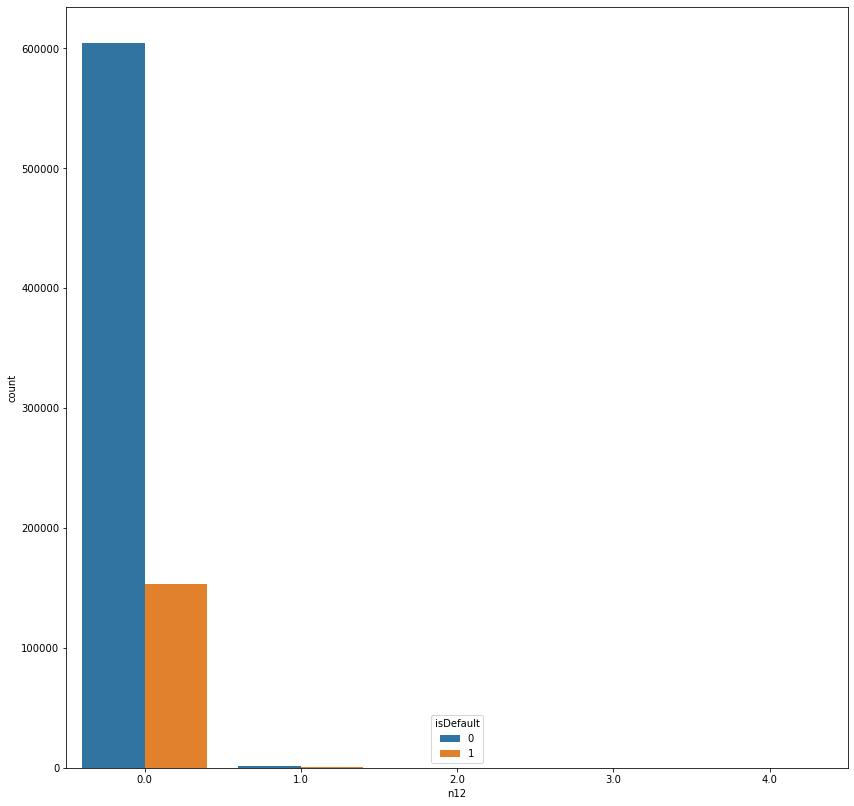

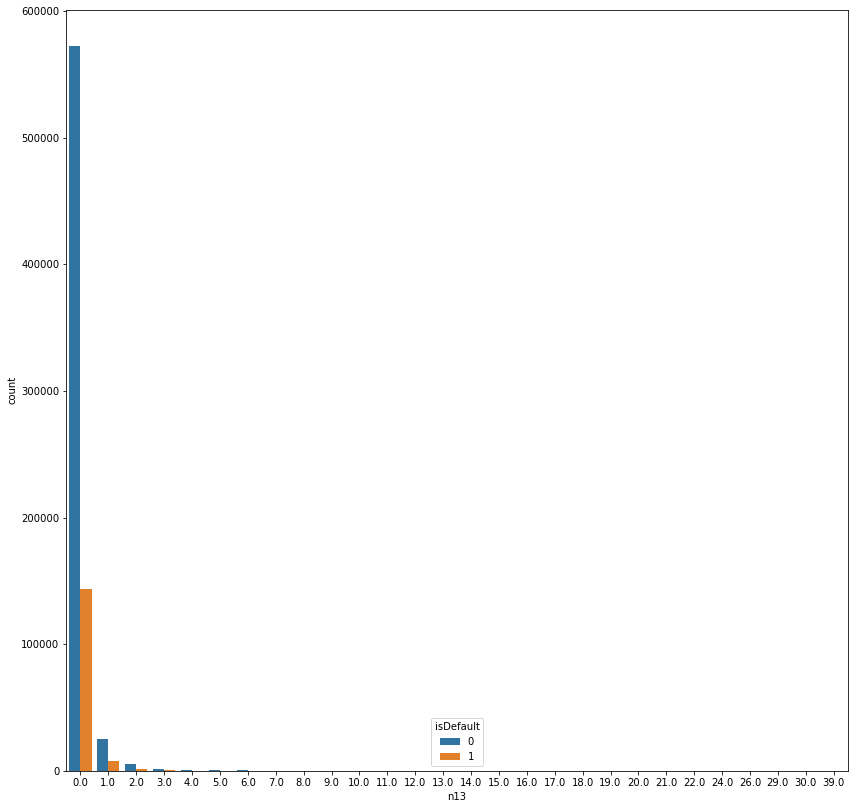

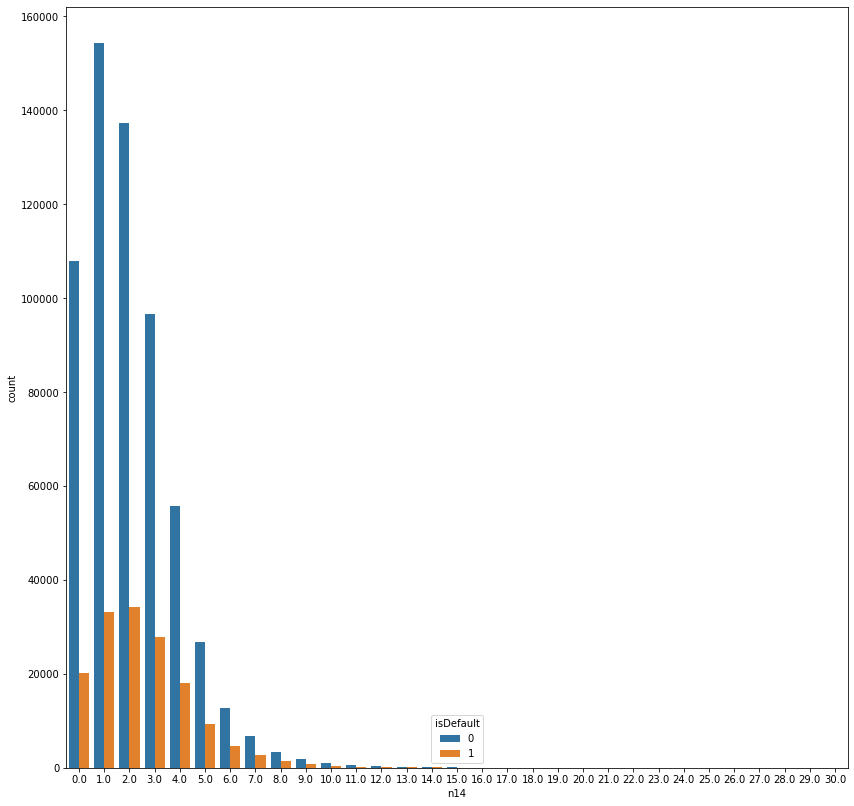

In [11]:
for x in ['n0', 'n1', 'n2', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']:
    plt.figure(figsize=(14,14))
    sns.countplot(data=train, x=x, hue='isDefault')

Text(0.5, 0, 'FICORangeLow')

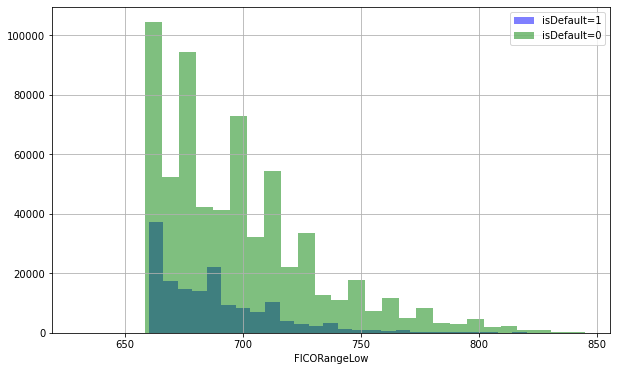

In [15]:
plt.figure(figsize=(10,6))
train[train['isDefault']==1]['ficoRangeLow'].hist(bins=30, alpha=0.5, color='blue', label='isDefault=1')
train[train['isDefault']==0]['ficoRangeLow'].hist(bins=30, alpha=0.5, color='green', label='isDefault=0')
plt.legend()
plt.xlabel('FICORangeLow')

Text(0.5, 0, 'FICORangeHigh')

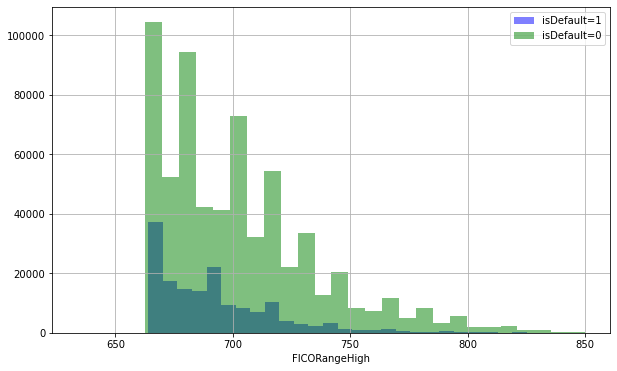

In [16]:
plt.figure(figsize=(10,6))
train[train['isDefault']==1]['ficoRangeHigh'].hist(bins=30, alpha=0.5, color='blue', label='isDefault=1')
train[train['isDefault']==0]['ficoRangeHigh'].hist(bins=30, alpha=0.5, color='green', label='isDefault=0')
plt.legend()
plt.xlabel('FICORangeHigh')